In [16]:
import pandas as pd
data = {'Customer_ID': [101, 102, 103, 101, 104, 102, 101, 105, 102, 103],
        'Purchase_Amount': [200, 150, 180, 220, 300, 200, 100, 400, 250, 300]}
df=pd.DataFrame(data, columns=['Customer_ID','Purchase_Amount'])
# Group customers by their ids and calculate the total number of purchases per customer
total_no_of_purchase = df.groupby(by="Customer_ID").sum('Purchae_Amount').reset_index()
print("Total Purchases per Customer: \n", total_no_of_purchase)
# Identify the top 3 frequency customers
top_3_customer=total_no_of_purchase.sort_values(by="Purchase_Amount",ascending=False).head(3)
print("\n Top 3 Frequent Customers:\n", top_3_customer)

Total Purchases per Customer: 
    Customer_ID  Purchase_Amount
0          101              520
1          102              600
2          103              480
3          104              300
4          105              400

 Top 3 Frequent Customers:
    Customer_ID  Purchase_Amount
1          102              600
0          101              520
2          103              480


In [ ]:
Question 2:
A company tracks the daily sales of a product over a month. You are tasked with identifying any abnormal sales data using the IQR (Interquartile Range) method.
Dataset (Daily Sales in Units):

data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

Tasks:
1. Calculate the Q1 (25th percentile) and Q3 (75th percentile).
2. Determine the IQR.
3. Identify the Lower Bound and Upper Bound.
4. Detect and display the outliers.
5. Replace the Outliers with the Median Value.
Expected Output:
Q1: 31.5, Q3: 83.75, IQR: 52.25
Lower Bound: -46.875, Upper Bound: 162.125
Outliers Detected:
    Day  Sales
29   30    200
Data After Replacing Outliers with Median:
    Day  Sales
0     1   25.0
1     2   30.0
2     3   28.0
3     4   45.0
4     5   55.0


In [93]:
import numpy as np
data = {'Day': range(1, 31),
        'Sales': [25, 30, 28, 45, 55, 60, 22, 80, 95, 120,
                  33, 29, 27, 35, 40, 50, 85, 110, 105, 92,
                  30, 34, 31, 33, 36, 42, 44, 48, 90, 200]}

data1=pd.DataFrame(data)
# Calculare the Q1,Q3 and IQR
Q1=data1['Sales'].quantile(0.25)
Q3=data1['Sales'].quantile(0.75)
IQR=Q3-Q1
print(f"Q1:{Q1}, Q3:{Q3}, IQR:{IQR}")
# Calculate lower and upper  bound
Lower_bound=Q1-1.5*IQR
Upper_bound = Q3 + 1.5*IQR
print(f"Lower Bound: {Lower_bound}, Upper Bound: {Upper_bound}")
outliers_df=data1[(data1['Sales']<Lower_bound)|(data1['Sales']>Upper_bound)]
print("Outliers Detected:\n", outliers_df)
data1['Sales']= data1["Sales"].replace(200, np.median(data['Sales']))
print("Data After Replacing Outliers with Median:\n",data1)

Q1:31.5, Q3:83.75, IQR:52.25
Lower Bound: -46.875, Upper Bound: 162.125
Outliers Detected:
     Day  Sales
29   30    200
Data After Replacing Outliers with Median:
     Day  Sales
0     1     25
1     2     30
2     3     28
3     4     45
4     5     55
5     6     60
6     7     22
7     8     80
8     9     95
9    10    120
10   11     33
11   12     29
12   13     27
13   14     35
14   15     40
15   16     50
16   17     85
17   18    110
18   19    105
19   20     92
20   21     30
21   22     34
22   23     31
23   24     33
24   25     36
25   26     42
26   27     44
27   28     48
28   29     90
29   30     43


In [ ]:
A pharmaceutical company is testing the effectiveness of a new drug to reduce blood pressure. Two groups of patients were selected:
Group 1 (Treatment): Received the drug
Group 2 (Control): Received a placebo
The company wants to check if there is a significant difference in the blood pressure levels between the two groups using an Independent T-Test.
Dataset:
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
Tasks:
1.	Perform an Independent T-Test.
2.	State the null and alternative hypotheses.
3.	Calculate the p-value.
4.	Conclude whether the drug has a significant effect.

    Expected Output:
T-Statistic: -11.870553692962726
P-Value: 6.008066605173374e-10


In [21]:
# To test the significant difference in the blood pressure levels between the two groups
# Null hypothesis : There is no siginificant difference in the blood pressure levels between the two groups
# Reject null hypothesis if pvalue<0.5
import pandas as pd
from scipy import stats
data = {'Group': ['Treatment']*10 + ['Control']*10,
        'Blood_Pressure': [120, 115, 118, 123, 122, 119, 124, 117, 116, 121,
                            130, 135, 140, 138, 142, 136, 139, 134, 137, 141]}
data_2 = pd.DataFrame(data)
group_1_val = data_2['Blood_Pressure'][:10]
group_2_val = data_2['Blood_Pressure'][10:]

p_val, t_val = stats.ttest_ind(group_1_val, group_2_val)

print("T_Statistic:", p_val,"\n P_value:",t_val)

T_Statistic: -11.870553692962726 
 P_value: 6.008066605173374e-10


In [ ]:
# Here pvalue is 0.0000000006008 < 0.5
# Hence reject null hypothesis
# There is a significant difference in the blood pressure levles between the two groups
# i.e drug has a significant effect

In [ ]:
Question 4:
GlobalMart is a large retailer conducting advertisement campaigns in different regions. The company spends money on two types of advertisements:
TV Ads and Social Media Ads
They want to analyze how these ads influence their sales.
Your task is to calculate the Covariance and Correlation to determine which type of ad has a stronger impact on sales.
Tasks :
1.	Calculate the Covariance between ad budgets and sales to measure the direction of the relationship.
2.	Calculate the Correlation to measure the strength of the relationship.
3.	Determine which type of ad is more effective for increasing sales.
 

Expected Output:
Covariance (TV vs Sales): 3625.0
Covariance (Social Media vs Sales): 3225.0
Correlation (TV vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9724846021568381




In [18]:
import pandas as pd
data={'Region': ['North','South', 'East','West','Central'],
      'Tv_Ad_Budget':[200,300,400,500,600],
      'Social_Media_Budget':[150,250,300,450,500],
      'Sales':[20,35,50,60,80]}
GlobalMart_df = pd.DataFrame(data)

# Calculate the covariance between ad budgets and sales to measure the direction of the relationship
cov_Ad_Sales=GlobalMart_df['Tv_Ad_Budget'].cov(GlobalMart_df['Sales'])
print("Covariance (TV vs Sales):", float(cov_Ad_Sales))
cov_Social_Sales=GlobalMart_df['Social_Media_Budget'].cov(GlobalMart_df['Sales'])
print("Covariance (Social Media vs Sales):",float(cov_Social_Sales))
# Calculate the Correlation to measure the strength of the relationship 
cor_Tv_Sales = GlobalMart_df['Tv_Ad_Budget'].corr(GlobalMart_df['Sales'])
print("Correlation (Tv vs Sales):", cor_Tv_Sales)
cor_Social_Sales = GlobalMart_df['Social_Media_Budget'].corr(GlobalMart_df['Sales'])
print("Correlation (Social Media vs Sales):", cor_Tv_Sales)
# As the covariance value and Correlation value is higher for Tv Ads vs sales 
# So TV Ads have a stronger impact on Sales.

Covariance (TV vs Sales): 3625.0
Covariance (Social Media vs Sales): 3225.0
Correlation (Tv vs Sales): 0.9958640886279954
Correlation (Social Media vs Sales): 0.9958640886279954


Mean Delivery Time: 65.0625
Standard Deviation of Delivery Time: 41.718504212759115


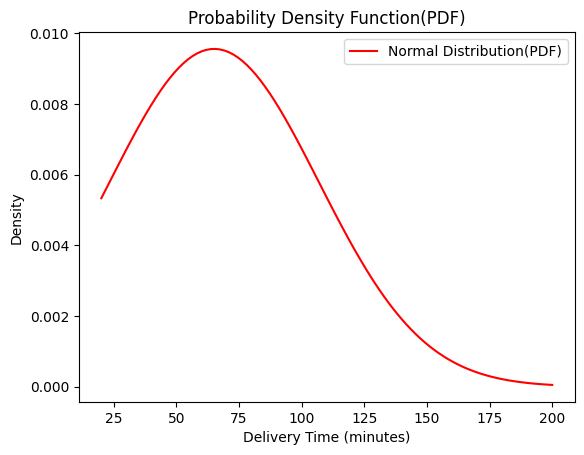

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
delivery_times = np.array([25, 30, 28, 45, 55, 60, 22, 80, 95, 120, 33, 29, 27, 35, 40, 50, 85, 110, 105, 92, 30, 34, 
                           31, 33, 36, 42, 44, 48, 90, 200, 20, 25, 27, 32, 38, 41, 47, 58, 62, 77, 80, 84, 90, 110, 123, 145, 150, 160])

#Calculate the mean and standard deviation of the delivery times
delivery_mean = delivery_times.mean()
print("Mean Delivery Time:", delivery_mean)
delivery_Std = delivery_times.std()
print("Standard Deviation of Delivery Time:", delivery_Std)
# Generate x values
x = np.linspace(min(delivery_times), max(delivery_times), 100)
#x = np.arange(delivery_mean - 4*delivery_Std, delivery_mean + 4*delivery_Std, 0.1)
#x = np.linspace(min(delivery_times) - 10, max(delivery_times) + 10, 1000)
# Compute the normal PDF
pdf = norm.pdf(x, loc=delivery_mean, scale=delivery_Std)

# Plot the pdf
plt.plot(x, pdf, color='red', label='Normal Distribution(PDF)')
plt.title('Probability Density Function(PDF)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.show()